Data loaded successfully: <Signal2D, title: , dimensions: (|503, 503)>
Detected structured RGB data. Converting to standard numpy array...
Converting RGB to Grayscale for statistical analysis...


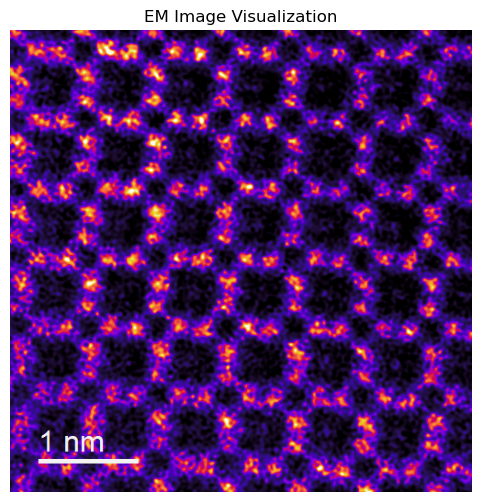

------------------------------
Basic Image Statistics (Grayscale)
------------------------------
Mean Intensity:       59.01
Standard Deviation:   42.33
Min Intensity:        0.0
Max Intensity:        246.33333333333334


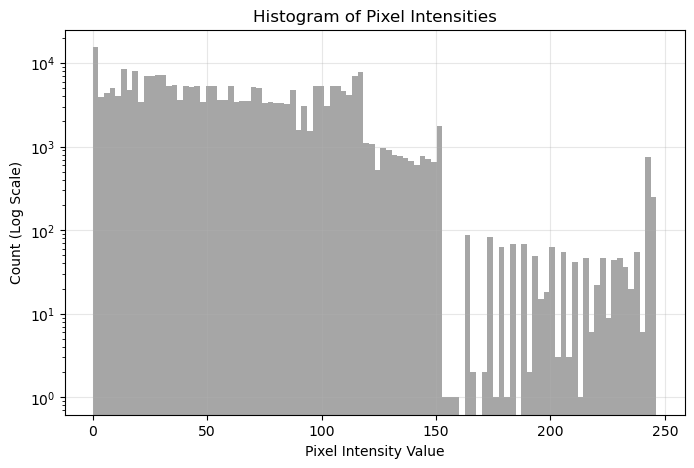

In [4]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots are displayed inline within the Notebook
%matplotlib inline

# ==========================================
# Step 1: Load Data
# ==========================================
filename = "example_EM_Image.tif"
s = hs.load(filename)
print(f"Data loaded successfully: {s}")

# ==========================================
# Step 2: Data Preprocessing (Fixing the Error)
# ==========================================
raw_data = s.data

# 1. Fix the "Structured Array" TypeError
# The error happened because your TIFF file stores pixels as a structure: [('R', 'u1'), ('G', 'u1'), ('B', 'u1')]
# instead of a standard matrix. We must convert it to a standard (Height, Width, 3) array.
if raw_data.dtype.names is not None:
    print("Detected structured RGB data. Converting to standard numpy array...")
    # .view((np.uint8, 3)) tells numpy to treat the 3 named fields as 3 simple numbers
    image_data = raw_data.view((np.uint8, 3))
else:
    image_data = raw_data

# 2. Convert RGB to Grayscale for Statistics
# We need a single "intensity" value for statistics and histograms.
# If the image is 3D (Color/RGB), we average the 3 channels to get 2D (Grayscale).
if image_data.ndim == 3:
    print("Converting RGB to Grayscale for statistical analysis...")
    # axis=2 means we average across the color channels (R, G, B)
    gray_data = np.mean(image_data, axis=2)
else:
    gray_data = image_data

# ==========================================
# Step 3: Display Image
# ==========================================
plt.figure(figsize=(8, 6))

# We can display the color image (image_data) here
plt.imshow(image_data, cmap='gray') 
plt.title("EM Image Visualization")
plt.axis('off') # Hide axes
plt.show()

# ==========================================
# Step 4: Basic Statistics
# ==========================================
# Note: We use 'gray_data' (1D intensity) for math, not the 3D color data
mean_val = np.mean(gray_data)
std_val = np.std(gray_data)
min_val = np.min(gray_data)
max_val = np.max(gray_data)

print("-" * 30)
print("Basic Image Statistics (Grayscale)")
print("-" * 30)
print(f"Mean Intensity:       {mean_val:.2f}")
print(f"Standard Deviation:   {std_val:.2f}")
print(f"Min Intensity:        {min_val}")
print(f"Max Intensity:        {max_val}")

# ==========================================
# Step 5: Plot Histogram
# ==========================================
plt.figure(figsize=(8, 5))
plt.hist(gray_data.flatten(), bins=100, color='gray', alpha=0.7, log=True)
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Intensity Value")
plt.ylabel("Count (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

The grayscale histogram exhibits a broad and relatively uniform distribution within the intensity range of 0 to 150. In this region, the pixel count remains consistent at approximately 5,000. The range of the image extends up to a maximum intensity of 250.

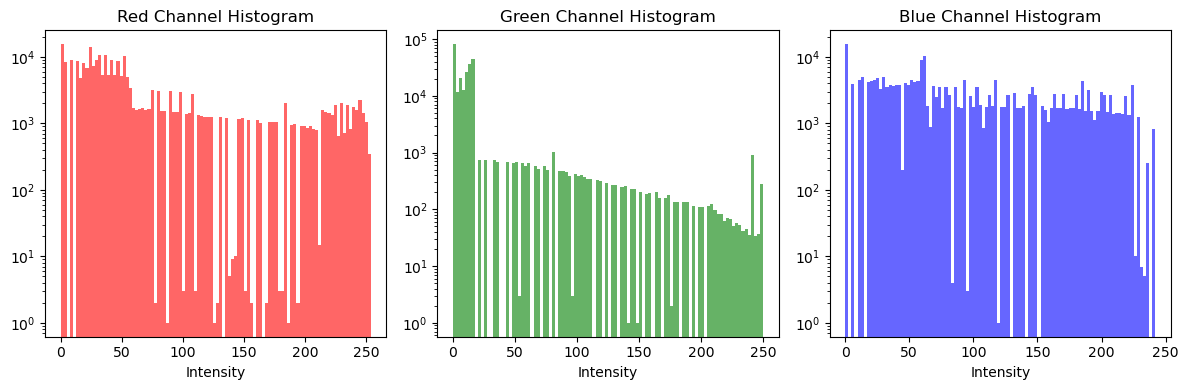

------------------------------
Color Channel Statistics
------------------------------
Red Mean: 67.74
Green Mean: 15.32
Blue Mean: 93.99


In [6]:
# ==========================================
# RGB Channel analysis
# ==========================================
plt.figure(figsize=(12, 4))

colors = ['Red', 'Green', 'Blue']

for i in range(3):
    channel_data = image_data[:, :, i] 
    
    plt.subplot(1, 3, i+1)
    plt.hist(channel_data.flatten(), bins=100, color=colors[i].lower(), alpha=0.6, log=True)
    plt.title(f"{colors[i]} Channel Histogram")
    plt.xlabel("Intensity")

plt.tight_layout()
plt.show()


print("-" * 30)
print("Color Channel Statistics")
print("-" * 30)
for i in range(3):
    print(f"{colors[i]} Mean: {np.mean(image_data[:, :, i]):.2f}")